In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

%matplotlib inline

In [72]:
# Load Data

data = pd.read_csv('/home/souche/Users/Moey/Other/Car_back/both_train.csv')

In [73]:
# Create province var

data['province'] = data['plate_no'].apply(lambda x:x[0])

In [74]:
# Selected needed X and Y

data = data.iloc[:,[3,7,8,10,11,12,14,15,16,17,18,20,21,23,24,22]].copy()

In [75]:
# Convert all categorical vars into object

data.loc[:, 'brand_name'] = data['brand_name'].astype('object')
data.loc[:, 'sex'] = data['sex'].astype('object')
data.loc[:, 'province'] = data['province'].astype('object')

In [76]:
# Select all categorical vars

categorical_feats = [f for f in data.columns if data[f].dtype=='object']
feats_name = [f for f in data.columns if f != 'is_return']

In [77]:
# pd.factorize() would automatically convert NaN into -1
# LightGBM would treat categorical vars' negative value as NaN
# Categorical vars in LightGBM can only be 0, 1, 2 .... type 
# We can use int/category in the astype

for f_ in categorical_feats:
    
    # Label Encoder
    data[f_], unique = pd.factorize(data[f_])
    
    # Convert type into int
    data[f_] = data[f_].astype(int)    
    
    # Print how it do the label encoder
    print('{}: {} \n'.format(f_, list(enumerate(unique))))

brand_name: [(0, '标致'), (1, 'Jeep'), (2, '菲亚特'), (3, '本田'), (4, '别克'), (5, '马自达'), (6, '现代'), (7, '捷豹'), (8, '雪铁龙'), (9, '路虎'), (10, '大众'), (11, '日产'), (12, '荣威'), (13, '斯柯达'), (14, '阿尔法罗密欧'), (15, '福特'), (16, '英菲尼迪'), (17, '起亚'), (18, '铃木'), (19, '三菱'), (20, 'MINI'), (21, '奔驰'), (22, '宝马'), (23, '东风风神'), (24, '沃尔沃'), (25, '奥迪'), (26, 'MG'), (27, '丰田'), (28, '玛莎拉蒂')] 

sex: [(0, 1.0), (1, 0.0)] 

province: [(0, '粤'), (1, '闽'), (2, '浙'), (3, '川'), (4, '鄂'), (5, '湘'), (6, '陕'), (7, '云'), (8, '豫'), (9, '渝'), (10, '苏'), (11, '赣'), (12, '晋'), (13, '桂'), (14, '鲁'), (15, '黑'), (16, '皖'), (17, '宁'), (18, '辽'), (19, '吉'), (20, '蒙'), (21, '贵'), (22, '甘'), (23, '沪'), (24, '琼')] 



In [78]:
# Split data into train and test

train_feature = [f for f in data if f not in ['is_return']]
y = data['is_return'].copy()
X_train,X_test,Y_train,Y_test = train_test_split(data[train_feature],y
                                                 ,test_size = 0.2, random_state = 101)

In [80]:
# Load data into LGB


train = lgb.Dataset(data=X_train,
                    label=Y_train,
                    feature_name = feats_name,
                    categorical_feature = categorical_feats,
                    free_raw_data=False)

valid = lgb.Dataset(data=X_test,
                    label=Y_test,
                    reference=train,
                    feature_name = feats_name,
                    categorical_feature = categorical_feats,
                    free_raw_data=False)

In [94]:
# Baseline Model

parameters = {
    'objective': 'binary',        # 模型是回归还是分类
    'metric': 'auc',              # 验证模型的方式 | ['auc', 'binary_logloss] <-- 用这种方式指定多种验证metrics
    'is_unbalance': 'true',       # 数据是否unbalance
    'boosting': 'gbdt',           # bossting方式
    'num_leaves': 20,             # 每棵树叶子数
    'max_depth':6,                # 树的最大深度
    'feature_fraction': 1,        # 每次迭代使用的特征数量
    'bagging_fraction': 1,        # 每次迭代使用的数据数量
    'bagging_freq': 0,            # 每0次使用一次bagging
    'learning_rate': 0.1          # 学习率
}

base = lgb.train(params = parameters,
                 train_set = train,
                 valid_sets = valid,
                 num_boost_round = 10000,
                 early_stopping_rounds = 500)

[1]	valid_0's auc: 0.784452
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.788281
[3]	valid_0's auc: 0.788481
[4]	valid_0's auc: 0.790585
[5]	valid_0's auc: 0.795319
[6]	valid_0's auc: 0.796199
[7]	valid_0's auc: 0.793611
[8]	valid_0's auc: 0.79682
[9]	valid_0's auc: 0.797294
[10]	valid_0's auc: 0.798909
[11]	valid_0's auc: 0.799147
[12]	valid_0's auc: 0.799565
[13]	valid_0's auc: 0.800067
[14]	valid_0's auc: 0.801351
[15]	valid_0's auc: 0.801202
[16]	valid_0's auc: 0.80166
[17]	valid_0's auc: 0.80173
[18]	valid_0's auc: 0.801999
[19]	valid_0's auc: 0.802348
[20]	valid_0's auc: 0.801955
[21]	valid_0's auc: 0.80266
[22]	valid_0's auc: 0.803054
[23]	valid_0's auc: 0.803343
[24]	valid_0's auc: 0.80356
[25]	valid_0's auc: 0.804713
[26]	valid_0's auc: 0.804594
[27]	valid_0's auc: 0.804629
[28]	valid_0's auc: 0.804981
[29]	valid_0's auc: 0.80488
[30]	valid_0's auc: 0.805349
[31]	valid_0's auc: 0.805664
[32]	valid_0's auc: 0.806022
[33]	valid_0's auc: 0.80

/home/souche/projects/calculation/py3dev/lib/python3.5/site-packages/lightgbm/basic.py:1036: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')



[128]	valid_0's auc: 0.809976
[129]	valid_0's auc: 0.809891
[130]	valid_0's auc: 0.809787
[131]	valid_0's auc: 0.80983
[132]	valid_0's auc: 0.809624
[133]	valid_0's auc: 0.809653
[134]	valid_0's auc: 0.80999
[135]	valid_0's auc: 0.809974
[136]	valid_0's auc: 0.810139
[137]	valid_0's auc: 0.810081
[138]	valid_0's auc: 0.809868
[139]	valid_0's auc: 0.809683
[140]	valid_0's auc: 0.809591
[141]	valid_0's auc: 0.80955
[142]	valid_0's auc: 0.809187
[143]	valid_0's auc: 0.809094
[144]	valid_0's auc: 0.809205
[145]	valid_0's auc: 0.809205
[146]	valid_0's auc: 0.808986
[147]	valid_0's auc: 0.809177
[148]	valid_0's auc: 0.808816
[149]	valid_0's auc: 0.808675
[150]	valid_0's auc: 0.808717
[151]	valid_0's auc: 0.808712
[152]	valid_0's auc: 0.80872
[153]	valid_0's auc: 0.808596
[154]	valid_0's auc: 0.808492
[155]	valid_0's auc: 0.808448
[156]	valid_0's auc: 0.808452
[157]	valid_0's auc: 0.808865
[158]	valid_0's auc: 0.808726
[159]	valid_0's auc: 0.808537
[160]	valid_0's auc: 0.808202
[161]	valid_0

[463]	valid_0's auc: 0.798109
[464]	valid_0's auc: 0.798003
[465]	valid_0's auc: 0.79798
[466]	valid_0's auc: 0.798243
[467]	valid_0's auc: 0.798252
[468]	valid_0's auc: 0.798137
[469]	valid_0's auc: 0.798084
[470]	valid_0's auc: 0.797933
[471]	valid_0's auc: 0.797774
[472]	valid_0's auc: 0.797786
[473]	valid_0's auc: 0.797819
[474]	valid_0's auc: 0.797856
[475]	valid_0's auc: 0.797781
[476]	valid_0's auc: 0.797658
[477]	valid_0's auc: 0.797623
[478]	valid_0's auc: 0.797633
[479]	valid_0's auc: 0.797642
[480]	valid_0's auc: 0.797746
[481]	valid_0's auc: 0.797825
[482]	valid_0's auc: 0.797796
[483]	valid_0's auc: 0.797542
[484]	valid_0's auc: 0.797464
[485]	valid_0's auc: 0.797522
[486]	valid_0's auc: 0.79729
[487]	valid_0's auc: 0.797286
[488]	valid_0's auc: 0.79728
[489]	valid_0's auc: 0.797267
[490]	valid_0's auc: 0.797283
[491]	valid_0's auc: 0.797358
[492]	valid_0's auc: 0.797336
[493]	valid_0's auc: 0.797387
[494]	valid_0's auc: 0.797407
[495]	valid_0's auc: 0.797519
[496]	valid_0

In [92]:
# Tune params; Step - 1 | Find the best num_boost_round

parameters = {
    'boosting': 'gbdt', 
    'objective': 'binary', 
    'learning_rate': 0.1, 
    'num_leaves': 20, 
    'max_depth': 6,
    'metric': 'auc',
    'is_unbalance': 'true'
}

cv_results = lgb.cv(params = parameters, 
                    train_set = train, 
                    num_boost_round= 2000, 
                    nfold = 5,
                    stratified = False, # Whether to perform stratified sampling
                    early_stopping_rounds = 200, 
                    verbose_eval = 50)

print('best num_boost_round:', len(cv_results['auc-mean']))
print('best cv score:', cv_results['auc-mean'][-1])

/home/souche/projects/calculation/py3dev/lib/python3.5/site-packages/lightgbm/basic.py:1036: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[50]	cv_agg's auc: 0.802421 + 0.0109277
[100]	cv_agg's auc: 0.803137 + 0.0107697
[150]	cv_agg's auc: 0.801918 + 0.0109475
[200]	cv_agg's auc: 0.799899 + 0.010831
[250]	cv_agg's auc: 0.797927 + 0.0112838
best num_boost_round: 69
best cv score: 0.8037035918298148


In [93]:
# Tune params; Step-2 | Find the best num_leaves and max_depth

parameters = {
              'max_depth': range(3,8),
              'num_leaves' : range(2,30)
}
tmp1 = lgb.LGBMClassifier(boosting_type='gbdt',
                         objective = 'binary',
                         metric = 'auc',
                         verbose = 0,
                         is_unbalance = 'true',
                         learning_rate = 0.1,
                         n_estimators = 69   # 之前得到的最佳循环
                         )

gsearch = GridSearchCV(tmp1, param_grid=parameters, scoring='roc_auc', cv=5)
gsearch.fit(X_train, Y_train)

gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

/home/souche/projects/calculation/py3dev/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.77662, std: 0.01003, params: {'num_leaves': 2, 'max_depth': 3},
  mean: 0.78474, std: 0.00921, params: {'num_leaves': 3, 'max_depth': 3},
  mean: 0.79271, std: 0.00885, params: {'num_leaves': 4, 'max_depth': 3},
  mean: 0.79516, std: 0.01018, params: {'num_leaves': 5, 'max_depth': 3},
  mean: 0.79645, std: 0.01074, params: {'num_leaves': 6, 'max_depth': 3},
  mean: 0.79709, std: 0.01081, params: {'num_leaves': 7, 'max_depth': 3},
  mean: 0.79659, std: 0.01116, params: {'num_leaves': 8, 'max_depth': 3},
  mean: 0.79659, std: 0.01116, params: {'num_leaves': 9, 'max_depth': 3},
  mean: 0.79659, std: 0.01116, params: {'num_leaves': 10, 'max_depth': 3},
  mean: 0.79659, std: 0.01116, params: {'num_leaves': 11, 'max_depth': 3},
  mean: 0.79659, std: 0.01116, params: {'num_leaves': 12, 'max_depth': 3},
  mean: 0.79659, std: 0.01116, params: {'num_leaves': 13, 'max_depth': 3},
  mean: 0.79659, std: 0.01116, params: {'num_leaves': 14, 'max_depth': 3},
  mean: 0.79659, std: 0.01116, pa

In [95]:
# Tune params; Step-3 | Find the best learning rate

parameters = {
              'learning_rate':list(np.arange(0.01,1,0.01))
}

tmp2 = lgb.LGBMClassifier(boosting_type='gbdt',
                          objective = 'binary',
                          metric = 'auc',
                          verbose = 0,
                          learning_rate = 0.1,
                          n_estimators = 69,
                          max_depth = 7,
                          num_leaves = 22
                         )

gsearch = GridSearchCV(tmp2, param_grid=parameters, scoring='roc_auc', cv=5)
gsearch.fit(X_train, Y_train)

gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_


/home/souche/projects/calculation/py3dev/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.78399, std: 0.00785, params: {'learning_rate': 0.01},
  mean: 0.78827, std: 0.00866, params: {'learning_rate': 0.02},
  mean: 0.79199, std: 0.01021, params: {'learning_rate': 0.03},
  mean: 0.79586, std: 0.01028, params: {'learning_rate': 0.04},
  mean: 0.79806, std: 0.01115, params: {'learning_rate': 0.05},
  mean: 0.80009, std: 0.00982, params: {'learning_rate': 0.060000000000000005},
  mean: 0.80215, std: 0.00952, params: {'learning_rate': 0.06999999999999999},
  mean: 0.80252, std: 0.00947, params: {'learning_rate': 0.08},
  mean: 0.80361, std: 0.00832, params: {'learning_rate': 0.09},
  mean: 0.80368, std: 0.00789, params: {'learning_rate': 0.09999999999999999},
  mean: 0.80502, std: 0.00712, params: {'learning_rate': 0.11},
  mean: 0.80441, std: 0.00868, params: {'learning_rate': 0.12},
  mean: 0.80440, std: 0.00838, params: {'learning_rate': 0.13},
  mean: 0.80181, std: 0.00691, params: {'learning_rate': 0.14},
  mean: 0.80231, std: 0.00728, params: {'learning_rate': 0

In [106]:
# Train the model according to the Tuned Params
# auc increase nearly 0
# Tune Failed


parameters = {
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',   # if data balance
    'boosting': 'gbdt',
    'learning_rate': 0.11,
    
    # Below is the top 3 important paramas
    'num_leaves': 22,         
    'max_depth': 7,           
    'min_data_in_leaf': 100,  
    
    # Below used to solve overfitting
    'feature_fraction': 1, 
    'bagging_fraction': 1,
    'bagging_freq': 0,
    'lambda_l1': 0,
    'lambda_l2': 0, 
    'min_sum_hessian_in_leaf': 1e-3
}

model = lgb.train(parameters,
                 train,
                 valid_sets = valid,
                 num_boost_round = 10000,
                 early_stopping_rounds = 500,
                 categorical_feature = categorical_feats)

[1]	valid_0's auc: 0.785184
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.787915
[3]	valid_0's auc: 0.789473
[4]	valid_0's auc: 0.790806
[5]	valid_0's auc: 0.792288
[6]	valid_0's auc: 0.792169
[7]	valid_0's auc: 0.793889
[8]	valid_0's auc: 0.793124
[9]	valid_0's auc: 0.794773
[10]	valid_0's auc: 0.795207
[11]	valid_0's auc: 0.79582
[12]	valid_0's auc: 0.795304
[13]	valid_0's auc: 0.796006
[14]	valid_0's auc: 0.796539
[15]	valid_0's auc: 0.797474
[16]	valid_0's auc: 0.797199
[17]	valid_0's auc: 0.797891
[18]	valid_0's auc: 0.798137
[19]	valid_0's auc: 0.79878
[20]	valid_0's auc: 0.799851
[21]	valid_0's auc: 0.801222
[22]	valid_0's auc: 0.802516
[23]	valid_0's auc: 0.80348
[24]	valid_0's auc: 0.803804
[25]	valid_0's auc: 0.803607
[26]	valid_0's auc: 0.804267
[27]	valid_0's auc: 0.804545
[28]	valid_0's auc: 0.80477
[29]	valid_0's auc: 0.804524
[30]	valid_0's auc: 0.804949
[31]	valid_0's auc: 0.805287
[32]	valid_0's auc: 0.805808
[33]	valid_0's auc: 0.

[414]	valid_0's auc: 0.799536
[415]	valid_0's auc: 0.799431
[416]	valid_0's auc: 0.799459
[417]	valid_0's auc: 0.799248
[418]	valid_0's auc: 0.79936
[419]	valid_0's auc: 0.799226
[420]	valid_0's auc: 0.7992
[421]	valid_0's auc: 0.799091
[422]	valid_0's auc: 0.799293
[423]	valid_0's auc: 0.799309
[424]	valid_0's auc: 0.799326
[425]	valid_0's auc: 0.799324
[426]	valid_0's auc: 0.799244
[427]	valid_0's auc: 0.799265
[428]	valid_0's auc: 0.79945
[429]	valid_0's auc: 0.799373
[430]	valid_0's auc: 0.799314
[431]	valid_0's auc: 0.799283
[432]	valid_0's auc: 0.799277
[433]	valid_0's auc: 0.799404
[434]	valid_0's auc: 0.799556
[435]	valid_0's auc: 0.799519
[436]	valid_0's auc: 0.799556
[437]	valid_0's auc: 0.799545
[438]	valid_0's auc: 0.799383
[439]	valid_0's auc: 0.799376
[440]	valid_0's auc: 0.799383
[441]	valid_0's auc: 0.799394
[442]	valid_0's auc: 0.799364
[443]	valid_0's auc: 0.799399
[444]	valid_0's auc: 0.799365
[445]	valid_0's auc: 0.799336
[446]	valid_0's auc: 0.799374
[447]	valid_0'

In [107]:
# Check if overfitting

ypred_train = model.predict(X_train,num_iteration=-1)
for i in range(len(ypred_train)):
    if ypred_train[i] >= 0.5:
        ypred_train[i] = 1
    else:
        ypred_train[i] = 0


# Accuracy in training set
accuracy = accuracy_score(Y_train,ypred_train)
accuracy

0.8092797410304828

In [108]:
# Convert result into 1/0 by 0.5 threshold

ypred = model.predict(X_test)
for i in range(len(ypred)):
    if ypred[i] >= 0.5:
        ypred[i] = 1
    else:
        ypred[i] = 0

In [109]:
# Accuracy in test set
accuracy = accuracy_score(Y_test,ypred)
accuracy

# The result showed that there is no overfitting but underfitting

# If overfitting exists, we can use bagging_fraction, 
# bagging_freq, feature_fraction, min_data_in_leaf, 
# min_sum_hessian_in_leaf, lambda_l1, lambda_l2 to solve this problem.

0.7615322363096844

In [110]:
# AUC
# 其实应该用model.predict(X_test)作为y_pred
# 因为AUC其实是Y_test和是正例的概率比
auc = roc_auc_score(Y_test,ypred)
auc

0.7257161766987222

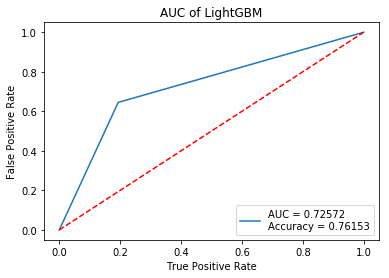

In [111]:
# AUC_Plot
# 与上述相同，AUC不应该用ypred，应该用model.predict(X_test)
fpr, tpr, _ = roc_curve(Y_test, ypred)
auc = roc_auc_score(Y_test,ypred)
accuracy = accuracy_score(Y_test,ypred)
plt.plot(fpr, tpr,label = 'AUC = {:1.5f}\nAccuracy = {:1.5f}'.format(auc,accuracy))
plt.legend(loc = 4)
plt.plot([0,1],[0,1],'r--')
plt.title('AUC of LightGBM')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()

In [112]:
# Confusion Matrix
cm = pd.crosstab(Y_test,ypred,rownames=['Actual'],colnames=['Predicted'])
cm

Predicted,0.0,1.0
Actual,,
0,2158,518
1,366,665


<Figure size 864x432 with 0 Axes>

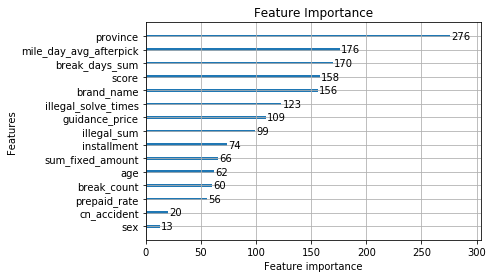

In [113]:
# Feature Importance Plot

plt.figure(figsize=(12,6))
lgb.plot_importance(model,max_num_features=30)
plt.title('Feature Importance')
plt.show()

In [ ]:
# Plot the tree split
# tree_index表示画第几棵树
graph = lgb.create_tree_diagraph(model, tree_index=0, name='Tree0')
graph.render(view=True)